# Import Packages 

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('../../data/processed/combined data/combined.csv')

In [6]:
df

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,ac4c9f2477a8bbad61ef1f125074a8c8,2022-05-11,2022-05-13,OAK,ATL,PT6H38M,False,False,False,317.60,2281.0,1652467320||1652475600,2022-05-13T11:42:00.000-07:00||2022-05-13T14:0...,1652472000||1652491200,2022-05-13T13:00:00.000-07:00||2022-05-13T21:2...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,4680||15600,338||1943,coach||coach
1,8d2669bd137dbf9bd028b9efad164b1a,2022-05-11,2022-05-13,OAK,ATL,PT6H17M,False,False,False,379.58,NaN,1652500560||1652509200,2022-05-13T20:56:00.000-07:00||2022-05-13T23:2...,1652506140||1652523180,2022-05-13T22:29:00.000-07:00||2022-05-14T06:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5580||13980,None||None,coach||coach
2,9dddcfcc0d457d02153b9e084f0f10e3,2022-05-11,2022-05-13,OAK,ATL,PT6H15M,False,False,False,463.58,NaN,1652457360||1652464260,2022-05-13T08:56:00.000-07:00||2022-05-13T10:5...,1652462280||1652479860,2022-05-13T10:18:00.000-07:00||2022-05-13T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4920||15600,None||None,coach||coach
3,bfb49b7de334caa506b1e889e620036e,2022-05-11,2022-05-13,OAK,ATL,PT9H6M,False,False,False,463.58,NaN,1652447100||1652464260,2022-05-13T06:05:00.000-07:00||2022-05-13T10:5...,1652452020||1652479860,2022-05-13T07:27:00.000-07:00||2022-05-13T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,4920||15600,None||None,coach||coach
4,4209e0b6a2eab5cd0d2a72bd1d34261a,2022-05-11,2022-05-13,OAK,ATL,PT14H13M,False,False,False,463.58,NaN,1652472000||1652509200,2022-05-13T13:00:00.000-07:00||2022-05-13T23:2...,1652477460||1652523180,2022-05-13T14:31:00.000-07:00||2022-05-14T06:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5460||13980,None||None,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,661b17139a35725f8f83cd30c3b88003,2022-05-05,2022-05-20,MIA,SFO,PT9H58M,False,False,False,770.60,3039.0,1653064320||1653083400,2022-05-20T12:32:00.000-04:00||2022-05-20T16:5...,1653076500||1653100200,2022-05-20T14:55:00.000-05:00||2022-05-20T19:3...,ORD||SFO,MIA||ORD,United||Alaska Airlines,UA||AS,Boeing 737-800||Airbus A320,12180||16800,1192||1847,coach||coach
13519995,63f60fafbd203109705bb4d707158f03,2022-05-05,2022-05-20,MIA,SFO,PT11H40M,False,False,False,801.60,3670.0,1653047400||1653066000,2022-05-20T07:50:00.000-04:00||2022-05-20T13:0...,1653058020||1653089400,2022-05-20T10:47:00.000-04:00||2022-05-20T16:3...,JFK||SFO,MIA||JFK,Delta||Alaska Airlines,DL||AS,Boeing 737-800||AIRBUS INDUSTRIE A321 SHARKLETS,10620||23400,1104||2566,coach||coach
13519996,5b12ac43b86335c14e62513ae8ad60e0,2022-05-05,2022-05-20,MIA,SFO,PT11H14M,False,False,False,813.60,3670.0,1653072780||1653090300,2022-05-20T14:53:00.000-04:00||2022-05-20T19:4...,1653083700||1653113220,2022-05-20T17:55:00.000-04:00||2022-05-20T23:0...,EWR||SFO,MIA||EWR,United||Alaska Airlines,UA||AS,Airbus A319||Boeing 737-900,10920||22920,1104||2566,coach||coach
13519997,fefd90edfc41b620eb69f90ab51781fc,2022-05-05,2022-05-20,MIA,SFO,PT11H24M,False,False,False,813.60,3670.0,1653062220||1653080700,2022-05-20T11:57:00.000-04:00||2022-05-20T17:0...,1653073200||1653103260,2022-05-20T15:00:00.000-04:00||2022-05-20T20:2...,EWR||SFO,MIA||EWR,United||Alaska Airlines,UA||AS,Airbus A320||Boeing 737-900,10980||22560,1104||2566,coach||coach


# Drop Nan and duplicates

In [7]:
df = df.dropna()

In [8]:
df = df.drop_duplicates()

In [9]:
df

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,ac4c9f2477a8bbad61ef1f125074a8c8,2022-05-11,2022-05-13,OAK,ATL,PT6H38M,False,False,False,317.60,2281.0,1652467320||1652475600,2022-05-13T11:42:00.000-07:00||2022-05-13T14:0...,1652472000||1652491200,2022-05-13T13:00:00.000-07:00||2022-05-13T21:2...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,4680||15600,338||1943,coach||coach
5,456379c3b4cf97d9ad8e14ae5328646e,2022-05-11,2022-05-13,OAK,ATL,PT9H3M,False,False,False,487.60,2175.0,1652487480||1652506800,2022-05-13T17:18:00.000-07:00||2022-05-13T23:4...,1652494500||1652520060,2022-05-13T20:15:00.000-06:00||2022-05-14T05:2...,SLC||ATL,OAK||SLC,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,7020||13260,588||1587,coach||coach
8,6dc9d1b69d965b5a278ad1ca15d59afa,2022-05-11,2022-05-13,OAK,ATL,PT12H29M,False,False,False,526.11,2393.0,1652451360||1652466240||1652485680,2022-05-13T07:16:00.000-07:00||2022-05-13T11:2...,1652456400||1652474400||1652496300,2022-05-13T08:40:00.000-07:00||2022-05-13T14:4...,LAX||DEN||ATL,OAK||LAX||DEN,Delta||United||United,DL||UA||UA,Embraer 175 (Enhanced Winglets)||Boeing 737-80...,5040||8160||10620,338||848||1207,coach||coach||coach
9,a1c23bbe9a97c6b4a6fc988d389a4ef4,2022-05-11,2022-05-13,OAK,ATL,PT12H29M,False,False,False,531.71,2393.0,1652451360||1652471460||1652485680,2022-05-13T07:16:00.000-07:00||2022-05-13T12:5...,1652456400||1652479800||1652496300,2022-05-13T08:40:00.000-07:00||2022-05-13T16:1...,LAX||DEN||ATL,OAK||LAX||DEN,Delta||United||United,DL||UA||UA,Embraer 175 (Enhanced Winglets)||Boeing 737-80...,5040||8340||10620,338||848||1207,coach||coach||coach
10,505ee69f290db89ebb964fa009291bac,2022-05-11,2022-05-13,OAK,ATL,PT7H52M,False,False,False,534.01,2150.0,1652493480||1652511180,2022-05-13T18:58:00.000-07:00||2022-05-14T00:5...,1652502660||1652521800,2022-05-13T22:31:00.000-06:00||2022-05-14T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||,9180||10620,943||1207,coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,661b17139a35725f8f83cd30c3b88003,2022-05-05,2022-05-20,MIA,SFO,PT9H58M,False,False,False,770.60,3039.0,1653064320||1653083400,2022-05-20T12:32:00.000-04:00||2022-05-20T16:5...,1653076500||1653100200,2022-05-20T14:55:00.000-05:00||2022-05-20T19:3...,ORD||SFO,MIA||ORD,United||Alaska Airlines,UA||AS,Boeing 737-800||Airbus A320,12180||16800,1192||1847,coach||coach
13519995,63f60fafbd203109705bb4d707158f03,2022-05-05,2022-05-20,MIA,SFO,PT11H40M,False,False,False,801.60,3670.0,1653047400||1653066000,2022-05-20T07:50:00.000-04:00||2022-05-20T13:0...,1653058020||1653089400,2022-05-20T10:47:00.000-04:00||2022-05-20T16:3...,JFK||SFO,MIA||JFK,Delta||Alaska Airlines,DL||AS,Boeing 737-800||AIRBUS INDUSTRIE A321 SHARKLETS,10620||23400,1104||2566,coach||coach
13519996,5b12ac43b86335c14e62513ae8ad60e0,2022-05-05,2022-05-20,MIA,SFO,PT11H14M,False,False,False,813.60,3670.0,1653072780||1653090300,2022-05-20T14:53:00.000-04:00||2022-05-20T19:4...,1653083700||1653113220,2022-05-20T17:55:00.000-04:00||2022-05-20T23:0...,EWR||SFO,MIA||EWR,United||Alaska Airlines,UA||AS,Airbus A319||Boeing 737-900,10920||22920,1104||2566,coach||coach
13519997,fefd90edfc41b620eb69f90ab51781fc,2022-05-05,2022-05-20,MIA,SFO,PT11H24M,False,False,False,813.60,3670.0,1653062220||1653080700,2022-05-20T11:57:00.000-04:00||2022-05-20T17:0...,1653073200||1653103260,2022-05-20T15:00:00.000-04:00||2022-05-20T20:2...,EWR||SFO,MIA||EWR,United||Alaska Airlines,UA||AS,Airbus A320||Boeing 737-900,10980||22560,11

In [24]:
df_look = df[df['totalFare'] > 5000]

In [25]:
df_look

,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
3342611,2022-06-27,LAX,CLT,PT9H45M,False,False,False,6934.10,2458.0,1656350100||1656377940,2022-06-27T10:15:00.000-07:00||2022-06-27T20:5...,1656369480||1656385200,2022-06-27T18:38:00.000-04:00||2022-06-27T23:0...,EWR||CLT,LAX||EWR,United||United,UA||UA,19380||7260,2458||545,coach||coach
6234185,2022-05-20,DTW,SFO,PT7H55M,False,False,False,7548.60,2606.0,1653045300||1653065700,2022-05-20T07:15:00.000-04:00||2022-05-20T09:5...,1653063000||1653073800,2022-05-20T09:10:00.000-07:00||2022-05-20T12:1...,SEA||SFO,DTW||SEA,American Airlines||American Airlines,AA||AA,17700||8100,1927||679,coach||coach
6732918,2022-05-18,DTW,SFO,PT8H16M,False,False,False,7548.60,2606.0,1652913300||1652935500,2022-05-18T18:35:00.000-04:00||2022-05-18T21:4...,1652931000||1652943060,2022-05-18T20:30:00.000-07:00||2022-05-18T23:5...,SEA||SFO,DTW||SEA,American Airlines||American Airlines,AA||AA,17700||7560,1927||679,coach||coach
10850190,2022-05-15,SFO,DTW,PT8H35M,False,False,False,7548.60,2606.0,1652619600||1652634480,2022-05-15T06:00:00.000-07:00||2022-05-15T10:0...,1652627100||1652650500,2022-05-15T08:05:00.000-07:00||2022-05-15T17:3...,SEA||DTW,SFO||SEA,American Airlines||American Airlines,AA||AA,7500||16020,679||1927,coach||coach
10930756,2022-06-08,SFO,DTW,PT8H51M,False,False,False,8260.61,2606.0,1654693200||1654709100,2022-06-08T06:00:00.000-07:00||2022-06-08T10:2...,1654701240||1654725060,2022-06-08T08:14:00.000-07:00||2022-06-08T17:5...,SEA||DTW,SFO||SEA,American Airlines||American Airlines,AA||AA,8040||15960,679||1927,first||coach
11050654,2022-05-26,SFO,DTW,PT7H10M,False,False,False,7548.60,2606.0,1653619800||1653630300,2022-05-26T19:50:00.000-07:00||2022-05-26T22:4...,1653627600||1653645600,2022-05-26T22:00:00.000-07:00||2022-05-27T06:0...,SEA||DTW,SFO||SEA,American Airlines||American Airlines,AA||AA,7800||15300,679||1927,coach||coach
11050655,2022-05-26,SFO,DTW,PT8H30M,False,False,False,7548.60,2606.0,1653615000||1653630300,2022-05-26T18:30:00.000-07:00||2022-05-26T22:4...,1653622980||1653645600,2022-05-26T20:43:00.000-07:00||2022-05-27T06:0...,SEA||DTW,SFO||SEA,American Airlines||American Airlines,AA||AA,7980||15300,679||1927,coach||coach
11050656,2022-05-26,SFO,DTW,PT9H30M,False,False,False,7548.60,2606.0,1653611400||1653630300,2022-05-26T17:30:00.000-07:00||2022-05-26T22:4...,1653619200||1653645600,2022-05-26T19:40:00.000-07:00||2022-05-27T06:0...,SEA||DTW,SFO||SEA,American Airlines||American Airlines,AA||AA,7800||15300,679||1927,coach||coach
11182135,2022-06-02,SFO,DTW,PT8H51M,False,False,False,8260.61,2606.0,1654174800||1654190700,2022-06-02T06:00:00.000-07:00||2022-06-02T10:2...,1654182840||1654206660,2022-06-02T08:14:00.000-07:00||2022-06-02T17:5...,SEA||DTW,SFO||SEA,American Airlines||American Airlines,AA||AA,8040||15960,679||1927,first||coach
11574122,2022-06-01,SFO,DTW,PT8H51M,False,False,False,8260.61,2606.0,1654088400||1654104300,2022-06-01T06:00:00.000-07:00||2022-06-01T10:2...,1654096440||1654120260,2022-06-01T08:14:00.000-07:00||2022-06-01T17:5...,SEA||DTW,SFO||SEA,American Airlines||American Airlines,AA||AA,8040||15960,679||1927,first||coach


In [8]:
df.dtypes

legId                                 object
searchDate                            object
flightDate                            object
startingAirport                       object
destinationAirport                    object
travelDuration                        object
isBasicEconomy                          bool
isRefundable                            bool
isNonStop                               bool
totalFare                            float64
totalTravelDistance                  float64
segmentsDepartureTimeEpochSeconds     object
segmentsDepartureTimeRaw              object
segmentsArrivalTimeEpochSeconds       object
segmentsArrivalTimeRaw                object
segmentsArrivalAirportCode            object
segmentsDepartureAirportCode          object
segmentsAirlineName                   object
segmentsAirlineCode                   object
segmentsEquipmentDescription          object
segmentsDurationInSeconds             object
segmentsDistance                      object
segmentsCa

In [9]:
# Drop these columns as they are not useful
df = df.drop(columns=[
    'legId', 
    'searchDate',
    'segmentsEquipmentDescription'
])

# transform airport code variable

useful 

In [11]:
df_airport = df[['startingAirport', 'destinationAirport','segmentsDepartureAirportCode', 'segmentsArrivalAirportCode']]

In [12]:
df_airport['segmentsArrivalAirportCode'] = df_airport['segmentsArrivalAirportCode'].apply(lambda x: x.split('||')[-1])


/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_28596/3282861126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airport['segmentsArrivalAirportCode'] = df_airport['segmentsArrivalAirportCode'].apply(lambda x: x.split('||')[-1])


In [13]:
df_airport['mergedAirportCode_1'] = df_airport['segmentsDepartureAirportCode'] + '||' + df_airport['segmentsArrivalAirportCode']
df_airport

/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_28596/3592362672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airport['mergedAirportCode_1'] = df_airport['segmentsDepartureAirportCode'] + '||' + df_airport['segmentsArrivalAirportCode']


,startingAirport,destinationAirport,segmentsDepartureAirportCode,segmentsArrivalAirportCode,mergedAirportCode_1
0,OAK,ATL,OAK||LAX,ATL,OAK||LAX||ATL
5,OAK,ATL,OAK||SLC,ATL,OAK||SLC||ATL
8,OAK,ATL,OAK||LAX||DEN,ATL,OAK||LAX||DEN||ATL
9,OAK,ATL,OAK||LAX||DEN,ATL,OAK||LAX||DEN||ATL
10,OAK,ATL,OAK||DEN,ATL,OAK||DEN||ATL
...,...,...,...,...,...
13519994,MIA,SFO,MIA||ORD,SFO,MIA||ORD||SFO
13519995,MIA,SFO,MIA||JFK,SFO,MIA||JFK||SFO
13519996,MIA,SFO,MIA||EWR,SFO,MIA||EWR||SFO
13519997,MIA,SFO,MIA||EWR,SFO,MIA||EWR||SFO


In [14]:
df_airport = df_airport.rename(columns= {'mergedAirportCode_1': 'route'} )

In [15]:
df_airport

,startingAirport,destinationAirport,segmentsDepartureAirportCode,segmentsArrivalAirportCode,route
0,OAK,ATL,OAK||LAX,ATL,OAK||LAX||ATL
5,OAK,ATL,OAK||SLC,ATL,OAK||SLC||ATL
8,OAK,ATL,OAK||LAX||DEN,ATL,OAK||LAX||DEN||ATL
9,OAK,ATL,OAK||LAX||DEN,ATL,OAK||LAX||DEN||ATL
10,OAK,ATL,OAK||DEN,ATL,OAK||DEN||ATL
...,...,...,...,...,...
13519994,MIA,SFO,MIA||ORD,SFO,MIA||ORD||SFO
13519995,MIA,SFO,MIA||JFK,SFO,MIA||JFK||SFO
13519996,MIA,SFO,MIA||EWR,SFO,MIA||EWR||SFO
13519997,MIA,SFO,MIA||EWR,SFO,MIA||EWR||SFO


## Airport Ananlysis

<Axes: xlabel='startingAirport', ylabel='totalFare'>

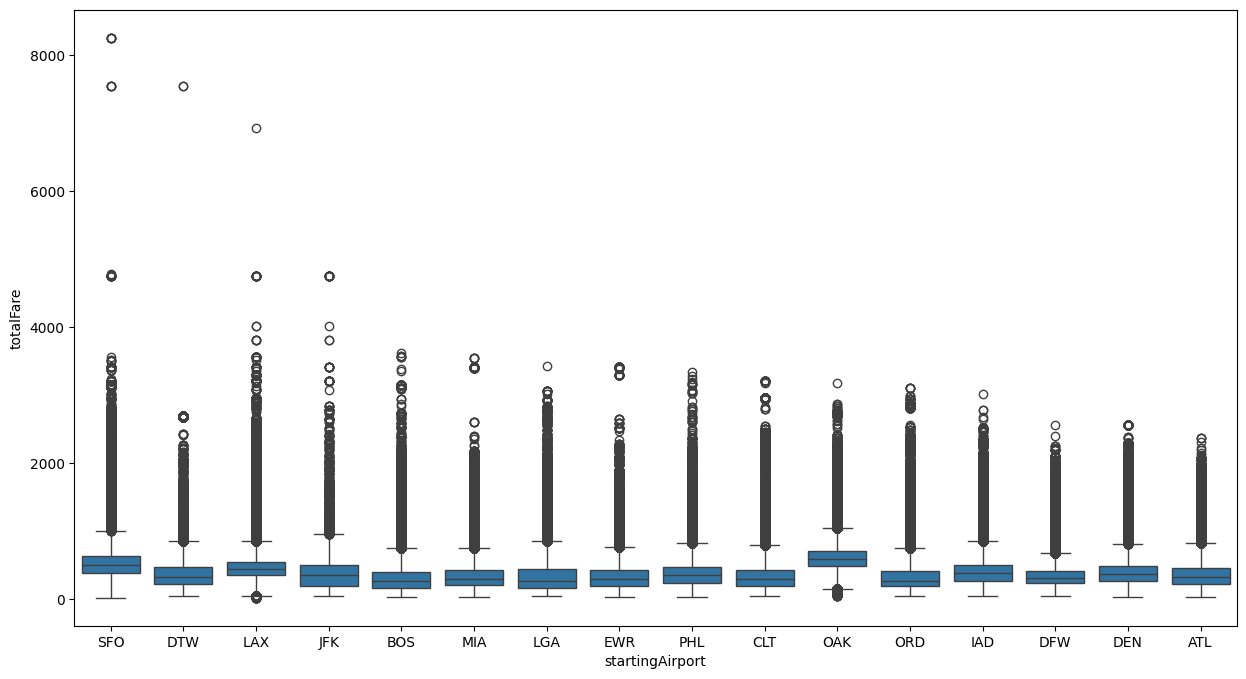

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x='startingAirport',y='totalFare',data=df.sort_values('totalFare',ascending=False))

<Axes: xlabel='destinationAirport', ylabel='totalFare'>

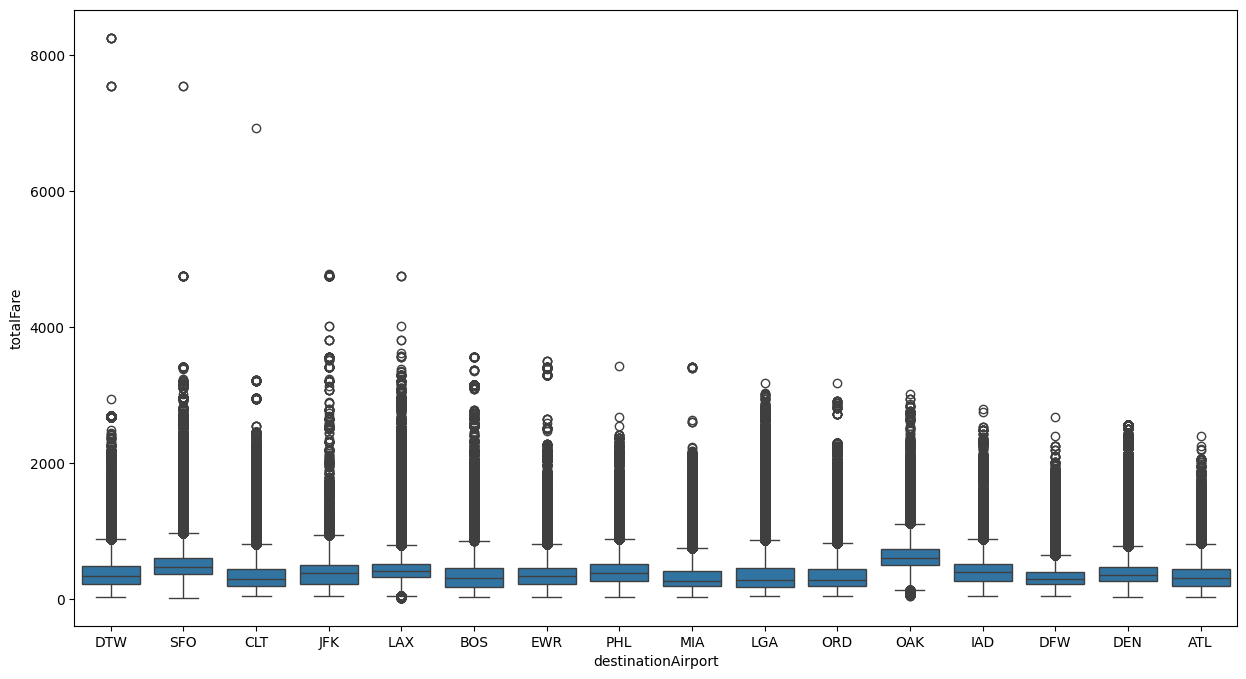

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x='destinationAirport',y='totalFare',data=df.sort_values('totalFare',ascending=False))

# transform airline

might not be useful

In [17]:
df_airline = pd.concat([df[['segmentsAirlineName']], df_airport[['route']]], axis=1)

In [18]:
df_airline

,segmentsAirlineName,route
0,Delta||Delta,OAK||LAX||ATL
5,Delta||Delta,OAK||SLC||ATL
8,Delta||United||United,OAK||LAX||DEN||ATL
9,Delta||United||United,OAK||LAX||DEN||ATL
10,Frontier Airlines||Frontier Airlines,OAK||DEN||ATL
...,...,...
13519994,United||Alaska Airlines,MIA||ORD||SFO
13519995,Delta||Alaska Airlines,MIA||JFK||SFO
13519996,United||Alaska Airlines,MIA||EWR||SFO
13519997,United||Alaska Airlines,MIA||EWR||SFO


# travel time 

useful

In [32]:
df_time = df[['travelDuration', 'segmentsDurationInSeconds']]

In [33]:
# Add the travel time together
df_time['totalTravelTimeInSeconds'] = df_time['segmentsDurationInSeconds'].apply(
    lambda x: sum(int(seg) for seg in x.split('||'))
)

# Delete the segmentsDurationInSeconds column
df_time = df_time.drop(['segmentsDurationInSeconds'], axis=1)

# Function to convert seconds to (days, hours, minutes)
def convert_seconds(seconds):
    days = seconds // 86400
    hours = (seconds % 86400) // 3600
    minutes = (seconds % 3600) // 60
    return f"{days}d {hours}h {minutes}m"

# Convert total travel time from seconds to (days, hours, minutes)
df_time['totalTravelTime'] = df_time['totalTravelTimeInSeconds'].apply(convert_seconds)

/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/609739572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['totalTravelTimeInSeconds'] = df_time['segmentsDurationInSeconds'].apply(


In [34]:
# Convert total travel time from seconds to (days, hours, minutes)
df_time['totalTravelTime'] = df_time['totalTravelTimeInSeconds'].apply(convert_seconds)

# Delete the segmentsDurationInSeconds column
df_time = df_time.drop(['totalTravelTimeInSeconds'], axis=1)

In [35]:
# Convert travelDuration to timedelta
df_time['travelDuration'] = pd.to_timedelta(df_time['travelDuration'])

# Define the formatting function
def format_duration(td):
    days = td.days
    hours, remainder = divmod(td.seconds, 3600)
    minutes = remainder // 60
    return f"{days}d {hours}h {minutes}m"

# Apply the formatting function to the travelDuration column
df_time['travelDuration'] = df_time['travelDuration'].apply(format_duration)

In [36]:
# Convert travelDuration and totalTravelTime back to timedelta
df_time['travelDuration'] = pd.to_timedelta(df_time['travelDuration'].str.replace('d ', ' days '))
df_time['totalTravelTime'] = pd.to_timedelta(df_time['totalTravelTime'].str.replace('d ', ' days '))

# Calculate totalLayoverTime
df_time['totalLayoverTime'] = df_time['travelDuration'] - df_time['totalTravelTime']

df_time['totalLayoverTime'] = df_time['totalLayoverTime'].apply(format_duration)

In [37]:
df_time['totalLayoverTime'] = pd.to_timedelta(df_time['totalLayoverTime'].str.replace('d ', ' days '))

In [38]:
# Define the formatting function without seconds
def format_duration_no_seconds(td):
    days = td.days
    hours, remainder = divmod(td.seconds, 3600)
    minutes = remainder // 60
    return f"{days}d {hours}h {minutes}m"

# Apply the formatting function to each relevant column
df_time['travelDuration'] = df_time['travelDuration'].apply(format_duration_no_seconds)
df_time['totalTravelTime'] = df_time['totalTravelTime'].apply(format_duration_no_seconds)
df_time['totalLayoverTime'] = df_time['totalLayoverTime'].apply(format_duration_no_seconds)

df_time


,travelDuration,totalTravelTime,totalLayoverTime
0,0d 6h 38m,0d 5h 38m,0d 1h 0m
5,0d 9h 3m,0d 5h 38m,0d 3h 25m
8,0d 12h 29m,0d 6h 37m,0d 5h 52m
9,0d 12h 29m,0d 6h 40m,0d 5h 49m
10,0d 7h 52m,0d 5h 30m,0d 2h 22m
...,...,...,...
13519994,0d 9h 58m,0d 8h 3m,0d 1h 55m
13519995,0d 11h 40m,0d 9h 27m,0d 2h 13m
13519996,0d 11h 14m,0d 9h 24m,0d 1h 50m
13519997,0d 11h 24m,0d 9h 19m,0d 2h 5m


## seperate totalLayoverTime 

In [137]:
# Separate totalLayoverTime into days, hours, and minutes
df_time[['days', 'hours', 'minutes']] = df_time['totalLayoverTime'].str.extract(r'(\d+)d\s(\d+)h\s(\d+)m')

# Convert the columns to integers for further analysis if needed
df_time['days'] = df_time['days'].astype(int)
df_time['hours'] = df_time['hours'].astype(int)
df_time['minutes'] = df_time['minutes'].astype(int)

# Display the updated DataFrame
df_time.head()


,travelDuration,totalTravelTime,totalLayoverTime,days,hours,minutes
0,0d 6h 38m,0d 5h 38m,0d 1h 0m,0,1,0
5,0d 9h 3m,0d 5h 38m,0d 3h 25m,0,3,25
8,0d 12h 29m,0d 6h 37m,0d 5h 52m,0,5,52
9,0d 12h 29m,0d 6h 40m,0d 5h 49m,0,5,49
10,0d 7h 52m,0d 5h 30m,0d 2h 22m,0,2,22


In [140]:
df_time = df_time.drop('days', axis=1)

In [141]:
df_time = df_time.rename(columns={"hours": "layover_h", "minutes": "layover_m"})

In [143]:
df_time

,travelDuration,totalTravelTime,totalLayoverTime,layover_h,layover_m
0,0d 6h 38m,0d 5h 38m,0d 1h 0m,1,0
5,0d 9h 3m,0d 5h 38m,0d 3h 25m,3,25
8,0d 12h 29m,0d 6h 37m,0d 5h 52m,5,52
9,0d 12h 29m,0d 6h 40m,0d 5h 49m,5,49
10,0d 7h 52m,0d 5h 30m,0d 2h 22m,2,22
...,...,...,...,...,...
13519994,0d 9h 58m,0d 8h 3m,0d 1h 55m,1,55
13519995,0d 11h 40m,0d 9h 27m,0d 2h 13m,2,13
13519996,0d 11h 14m,0d 9h 24m,0d 1h 50m,1,50
13519997,0d 11h 24m,0d 9h 19m,0d 2h 5m,2,5


# Distance 

In [116]:
df_dist = df[['totalTravelDistance', 'segmentsDistance']]

In [117]:
df_dist

,totalTravelDistance,segmentsDistance
0,2281.0,338||1943
5,2175.0,588||1587
8,2393.0,338||848||1207
9,2393.0,338||848||1207
10,2150.0,943||1207
...,...,...
13519994,3039.0,1192||1847
13519995,3670.0,1104||2566
13519996,3670.0,1104||2566
13519997,3670.0,1104||2566


# Cabin

isBasicEconomy is wrong

In [1]:
# Join columns from different datasets into a new DataFrame
s1 = df_airline['route']
s2 = df['segmentsCabinCode']

# Combine into a new DataFrame 
df_cabin = pd.concat([s1, s2], axis=1)


NameError: name 'df_airline' is not defined

In [ ]:
# Define cabin types
cabin_types = ['coach', 'business', 'first', 'premium coach']

# Function to count each cabin type
def count_cabin_types(cabin_code, cabin_types):
    counts = {cabin: 0 for cabin in cabin_types}
    segments = cabin_code.split('||')
    for segment in segments:
        if segment in counts:
            counts[segment] += 1
    return counts

# Apply function to create new columns
cabin_counts = df_cabin['segmentsCabinCode'].apply(lambda x: pd.Series(count_cabin_types(x, cabin_types)))
df_cabin = pd.concat([df_cabin, cabin_counts], axis=1)

In [ ]:
df_cabin

# date and time 

## depature

In [82]:
df_dep_date = df[['segmentsDepartureTimeRaw']]

In [84]:
df_dep_date['segmentsDepartureTimeRaw'] = df_dep_date['segmentsDepartureTimeRaw'].apply(lambda x: x.split('||')[0])

/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/2334269756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_date['segmentsDepartureTimeRaw'] = df_dep_date['segmentsDepartureTimeRaw'].apply(lambda x: x.split('||')[0])


In [93]:
df_dep_date['segmentsDepartureTimeRaw'] = pd.to_datetime(df_dep_date['segmentsDepartureTimeRaw'], utc=True)

/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/3367788186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_date['segmentsDepartureTimeRaw'] = pd.to_datetime(df_dep_date['segmentsDepartureTimeRaw'], utc=True)


In [95]:
df_dep_date['dep_day'] = df_dep_date['segmentsDepartureTimeRaw'].dt.day
df_dep_date['dep_month'] = df_dep_date['segmentsDepartureTimeRaw'].dt.month
df_dep_date['dep_hour'] = df_dep_date['segmentsDepartureTimeRaw'].dt.hour
df_dep_date['dep_minute'] = df_dep_date['segmentsDepartureTimeRaw'].dt.minute

/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/2103855625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_date['dep_day'] = df_dep_date['segmentsDepartureTimeRaw'].dt.day
/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/2103855625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_date['dep_month'] = df_dep_date['segmentsDepartureTimeRaw'].dt.month
/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/2103855625.py:3: SettingWithCopyWarning: 
A

In [100]:
df_dep_date = df_dep_date.drop(columns=['segmentsDepartureTimeRaw'])

In [101]:
df_dep_date

,dep_day,dep_month,dep_hour,dep_minute
0,13,5,18,42
5,14,5,0,18
8,13,5,14,16
9,13,5,14,16
10,14,5,1,58
...,...,...,...,...
13519994,20,5,16,32
13519995,20,5,11,50
13519996,20,5,18,53
13519997,20,5,15,57


## arrival date 

In [97]:
df_ar_date = df[['segmentsArrivalTimeRaw']]

In [103]:
df_ar_date['segmentsArrivalTimeRaw'] = df_ar_date['segmentsArrivalTimeRaw'].apply(lambda x: x.split('||')[-1])

/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/4135951762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar_date['segmentsArrivalTimeRaw'] = df_ar_date['segmentsArrivalTimeRaw'].apply(lambda x: x.split('||')[-1])


In [104]:
df_ar_date['segmentsArrivalTimeRaw'] = pd.to_datetime(df_ar_date['segmentsArrivalTimeRaw'], utc=True)

/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/2069714180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar_date['segmentsArrivalTimeRaw'] = pd.to_datetime(df_ar_date['segmentsArrivalTimeRaw'], utc=True)


In [105]:
df_ar_date

,segmentsArrivalTimeRaw
0,2022-05-14 01:20:00+00:00
5,2022-05-14 09:21:00+00:00
8,2022-05-14 02:45:00+00:00
9,2022-05-14 02:45:00+00:00
10,2022-05-14 09:50:00+00:00
...,...
13519994,2022-05-21 02:30:00+00:00
13519995,2022-05-20 23:30:00+00:00
13519996,2022-05-21 06:07:00+00:00
13519997,2022-05-21 03:21:00+00:00


In [106]:
df_ar_date['ar_day'] = df_ar_date['segmentsArrivalTimeRaw'].dt.day
df_ar_date['ar_month'] = df_ar_date['segmentsArrivalTimeRaw'].dt.month
df_ar_date['ar_hour'] = df_ar_date['segmentsArrivalTimeRaw'].dt.hour
df_ar_date['ar_minute'] = df_ar_date['segmentsArrivalTimeRaw'].dt.minute

df_ar_date = df_ar_date.drop(columns=['segmentsArrivalTimeRaw'])

/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/3368766206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar_date['ar_day'] = df_ar_date['segmentsArrivalTimeRaw'].dt.day
/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/3368766206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar_date['ar_month'] = df_ar_date['segmentsArrivalTimeRaw'].dt.month
/var/folders/0h/hhtvsf517t90vww44wtg0nrw0000gn/T/ipykernel_18566/3368766206.py:3: SettingWithCopyWarning: 
A value is 

In [107]:
df_ar_date

,ar_day,ar_month,ar_hour,ar_minute
0,14,5,1,20
5,14,5,9,21
8,14,5,2,45
9,14,5,2,45
10,14,5,9,50
...,...,...,...,...
13519994,21,5,2,30
13519995,20,5,23,30
13519996,21,5,6,7
13519997,21,5,3,21


# Layover

create a new varaible if it layover 1 or 0

In [131]:
df_layover = pd.concat([df['isNonStop'], df_airport['route']], axis=1)

In [132]:
df_layover

,isNonStop,route
0,False,OAK||LAX||ATL
5,False,OAK||SLC||ATL
8,False,OAK||LAX||DEN||ATL
9,False,OAK||LAX||DEN||ATL
10,False,OAK||DEN||ATL
...,...,...
13519994,False,MIA||ORD||SFO
13519995,False,MIA||JFK||SFO
13519996,False,MIA||EWR||SFO
13519997,False,MIA||EWR||SFO


In [133]:
# Calculate total layovers by counting '||' and subtracting 1 to get the number of stops
df_layover['totalLayover'] = df_layover['route'].apply(lambda x: x.count('||') - 1)

In [134]:
df_layover

,isNonStop,route,totalLayover
0,False,OAK||LAX||ATL,1
5,False,OAK||SLC||ATL,1
8,False,OAK||LAX||DEN||ATL,2
9,False,OAK||LAX||DEN||ATL,2
10,False,OAK||DEN||ATL,1
...,...,...,...
13519994,False,MIA||ORD||SFO,1
13519995,False,MIA||JFK||SFO,1
13519996,False,MIA||EWR||SFO,1
13519997,False,MIA||EWR||SFO,1


In [135]:
df_layover.totalLayover.value_counts()

totalLayover
1    7764405
0    3606467
2     929307
3      37718
Name: count, dtype: int64

# depature and arrival dummy 

In [144]:
df_airport_dummy = df[['startingAirport', 'destinationAirport']]

In [145]:
df_airport_dummy

,startingAirport,destinationAirport
0,OAK,ATL
5,OAK,ATL
8,OAK,ATL
9,OAK,ATL
10,OAK,ATL
...,...,...
13519994,MIA,SFO
13519995,MIA,SFO
13519996,MIA,SFO
13519997,MIA,SFO


In [146]:
# Create dummy variables with specific prefixes for startingAirport and destinationAirport
df_airport_dummy = pd.get_dummies(df_airport_dummy, 
                                  columns=['startingAirport', 'destinationAirport'], 
                                  prefix={'startingAirport': 'start_', 'destinationAirport': 'dest_'})

# Display the updated DataFrame
df_airport_dummy.head()

,start__ATL,start__BOS,start__CLT,start__DEN,start__DFW,start__DTW,start__EWR,start__IAD,start__JFK,start__LAX,start__LGA,start__MIA,start__OAK,start__ORD,start__PHL,start__SFO,dest__ATL,dest__BOS,dest__CLT,dest__DEN,dest__DFW,dest__DTW,dest__EWR,dest__IAD,dest__JFK,dest__LAX,dest__LGA,dest__MIA,dest__OAK,dest__ORD,dest__PHL,dest__SFO
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [147]:
df_airport_dummy = df_airport_dummy.astype(int)

In [148]:
df_airport_dummy

,start__ATL,start__BOS,start__CLT,start__DEN,start__DFW,start__DTW,start__EWR,start__IAD,start__JFK,start__LAX,start__LGA,start__MIA,start__OAK,start__ORD,start__PHL,start__SFO,dest__ATL,dest__BOS,dest__CLT,dest__DEN,dest__DFW,dest__DTW,dest__EWR,dest__IAD,dest__JFK,dest__LAX,dest__LGA,dest__MIA,dest__OAK,dest__ORD,dest__PHL,dest__SFO
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13519995,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13519996,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13519997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# cleaned data

add all the other columns together 

In [150]:
df.head()

,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,2022-05-13,OAK,ATL,PT6H38M,False,False,False,317.60,2281.0,1652467320||1652475600,2022-05-13T11:42:00.000-07:00||2022-05-13T14:0...,1652472000||1652491200,2022-05-13T13:00:00.000-07:00||2022-05-13T21:2...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,4680||15600,338||1943,coach||coach
5,2022-05-13,OAK,ATL,PT9H3M,False,False,False,487.60,2175.0,1652487480||1652506800,2022-05-13T17:18:00.000-07:00||2022-05-13T23:4...,1652494500||1652520060,2022-05-13T20:15:00.000-06:00||2022-05-14T05:2...,SLC||ATL,OAK||SLC,Delta||Delta,DL||DL,7020||13260,588||1587,coach||coach
8,2022-05-13,OAK,ATL,PT12H29M,False,False,False,526.11,2393.0,1652451360||1652466240||1652485680,2022-05-13T07:16:00.000-07:00||2022-05-13T11:2...,1652456400||1652474400||1652496300,2022-05-13T08:40:00.000-07:00||2022-05-13T14:4...,LAX||DEN||ATL,OAK||LAX||DEN,Delta||United||United,DL||UA||UA,5040||8160||10620,338||848||1207,coach||coach||coach
9,2022-05-13,OAK,ATL,PT12H29M,False,False,False,531.71,2393.0,1652451360||1652471460||1652485680,2022-05-13T07:16:00.000-07:00||2022-05-13T12:5...,1652456400||1652479800||1652496300,2022-05-13T08:40:00.000-07:00||2022-05-13T16:1...,LAX||DEN||ATL,OAK||LAX||DEN,Delta||United||United,DL||UA||UA,5040||8340||10620,338||848||1207,coach||coach||coach
10,2022-05-13,OAK,ATL,PT7H52M,False,False,False,534.01,2150.0,1652493480||1652511180,2022-05-13T18:58:00.000-07:00||2022-05-14T00:5...,1652502660||1652521800,2022-05-13T22:31:00.000-06:00||2022-05-14T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,9180||10620,943||1207,coach||coach


In [151]:
df_time.head()

,travelDuration,totalTravelTime,totalLayoverTime,layover_h,layover_m
0,0d 6h 38m,0d 5h 38m,0d 1h 0m,1,0
5,0d 9h 3m,0d 5h 38m,0d 3h 25m,3,25
8,0d 12h 29m,0d 6h 37m,0d 5h 52m,5,52
9,0d 12h 29m,0d 6h 40m,0d 5h 49m,5,49
10,0d 7h 52m,0d 5h 30m,0d 2h 22m,2,22


In [152]:
df

NameError: name 'df_dist' is not defined